# Signal Detection Theory and ROC

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import dslab

/Users/akem134/opt/anaconda3/envs/dslab/bin/python
{'numpy': '1.22.1', 'pandas': '1.4.3', 'seaborn': '0.11.2', 'sklearn': '1.1.1', 'matplotlib': '3.4.3'}
/Users/akem134/opt/anaconda3/envs/dslab/bin/python
{'numpy': '1.22.1', 'pandas': '1.4.3', 'seaborn': '0.11.2', 'sklearn': '1.1.1', 'matplotlib': '3.4.3'}


In [3]:
df = pd.read_csv('./data/FTIR_Spectra_instant_coffee.csv', index_col=0)
df.shape

(288, 56)

(288, 56)

# Lecture 8 on Signal Detection Theory

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
Sample Number:,,,,,,,,,,,,,,,,,,,,,
Group Code:,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
Wavenumbers,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,...,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta
810.548,21.22761979,10.36424268,13.11832444,15.66840884,16.63495952,13.16534882,12.60723223,16.10922758,13.56993291,14.67020411,...,11.71916759,9.106253982,8.343802657,9.425892805,10.11760123,8.962248884,10.64082482,10.7494047,10.24020041,10.91880607
814.408,21.83750917,10.56955401,13.50708386,15.80386848,17.05526334,13.58740534,13.27727227,16.34067596,13.72290689,14.95986297,...,11.82945802,9.243098876,8.425414627,9.86365095,10.25910167,9.345451483,11.13920059,10.90005154,10.45899096,11.37172994
818.268,22.72997487,10.44887452,13.47349516,15.97760653,17.61049509,13.99858385,13.17792276,16.39799406,13.89180767,14.86250654,...,12.01596934,9.305462673,8.281403222,9.854026689,10.16585294,9.281157939,11.07029305,10.76243519,10.43644326,11.27420943


,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
Sample Number:,,,,,,,,,,,,,,,,,,,,,
Group Code:,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
Wavenumbers,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,...,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta
810.548,21.22761979,10.36424268,13.11832444,15.66840884,16.63495952,13.16534882,12.60723223,16.10922758,13.56993291,14.67020411,...,11.71916759,9.106253982,8.343802657,9.425892805,10.11760123,8.962248884,10.64082482,10.7494047,10.24020041,10.91880607
814.408,21.83750917,10.56955401,13.50708386,15.80386848,17.05526334,13.58740534,13.27727227,16.34067596,13.72290689,14.95986297,...,11.82945802,9.243098876,8.425414627,9.86365095,10.25910167,9.345451483,11.13920059,10.90005154,10.45899096,11.37172994
818.268,22.72997487,10.44887452,13.47349516,15.97760653,17.61049509,13.99858385,13.17792276,16.39799406,13.89180767,14.86250654,...,12.01596934,9.305462673,8.281403222,9.854026689,10.16585294,9.281157939,11.07029305,10.76243519,10.43644326,11.27420943


In [5]:
df_trans = df.transpose()
df_trans.head()

Sample Number:,Group Code:,Wavenumbers,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,1,Arabica,21.22761979,21.83750917,22.72997487,22.51766332,21.04017788,19.25630567,18.51798162,18.34777311,...,4.299970929,4.271923704,4.251176344,4.219550754,4.168709344,4.129132627,4.1053365,4.078105142,4.051911511,4.042686486
2,1,Arabica,10.36424268,10.56955401,10.44887452,10.10069637,9.620371068,8.882498747,8.415528792,8.210217462,...,1.518926539,1.505118148,1.49313255,1.475562953,1.464681648,1.456444278,1.44208728,1.433697715,1.425288093,1.418704803
3,1,Arabica,13.11832444,13.50708386,13.47349516,12.87142757,12.18191852,11.23947971,10.51567153,10.46817847,...,2.273844495,2.25448126,2.236715052,2.214228806,2.196218213,2.181646057,2.164601637,2.146423384,2.13325502,2.121558649
4,1,Arabica,15.66840884,15.80386848,15.97760653,15.56948928,14.95042289,14.02959867,13.39673949,13.09236044,...,3.07567674,3.04601539,3.020124984,2.987410779,2.963815899,2.95481037,2.942520471,2.909017546,2.880988572,2.876201318
5,1,Arabica,16.63495952,17.05526334,17.61049509,17.21159357,16.21789739,15.2877505,14.42413258,13.92892074,...,3.379193768,3.342548894,3.310964331,3.281866256,3.263161084,3.241584122,3.213549483,3.183819511,3.157356908,3.146583839


Sample Number:,Group Code:,Wavenumbers,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,1,Arabica,21.22761979,21.83750917,22.72997487,22.51766332,21.04017788,19.25630567,18.51798162,18.34777311,...,4.299970929,4.271923704,4.251176344,4.219550754,4.168709344,4.129132627,4.1053365,4.078105142,4.051911511,4.042686486
2,1,Arabica,10.36424268,10.56955401,10.44887452,10.10069637,9.620371068,8.882498747,8.415528792,8.210217462,...,1.518926539,1.505118148,1.49313255,1.475562953,1.464681648,1.456444278,1.44208728,1.433697715,1.425288093,1.418704803
3,1,Arabica,13.11832444,13.50708386,13.47349516,12.87142757,12.18191852,11.23947971,10.51567153,10.46817847,...,2.273844495,2.25448126,2.236715052,2.214228806,2.196218213,2.181646057,2.164601637,2.146423384,2.13325502,2.121558649
4,1,Arabica,15.66840884,15.80386848,15.97760653,15.56948928,14.95042289,14.02959867,13.39673949,13.09236044,...,3.07567674,3.04601539,3.020124984,2.987410779,2.963815899,2.95481037,2.942520471,2.909017546,2.880988572,2.876201318
5,1,Arabica,16.63495952,17.05526334,17.61049509,17.21159357,16.21789739,15.2877505,14.42413258,13.92892074,...,3.379193768,3.342548894,3.310964331,3.281866256,3.263161084,3.241584122,3.213549483,3.183819511,3.157356908,3.146583839


In [6]:
df2 = df_trans.rename({'Wavenumbers': 'coffee'}, axis=1)
print(df2.shape)
df2.head()

(56, 288)
(56, 288)


Sample Number:,Group Code:,coffee,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,1,Arabica,21.22761979,21.83750917,22.72997487,22.51766332,21.04017788,19.25630567,18.51798162,18.34777311,...,4.299970929,4.271923704,4.251176344,4.219550754,4.168709344,4.129132627,4.1053365,4.078105142,4.051911511,4.042686486
2,1,Arabica,10.36424268,10.56955401,10.44887452,10.10069637,9.620371068,8.882498747,8.415528792,8.210217462,...,1.518926539,1.505118148,1.49313255,1.475562953,1.464681648,1.456444278,1.44208728,1.433697715,1.425288093,1.418704803
3,1,Arabica,13.11832444,13.50708386,13.47349516,12.87142757,12.18191852,11.23947971,10.51567153,10.46817847,...,2.273844495,2.25448126,2.236715052,2.214228806,2.196218213,2.181646057,2.164601637,2.146423384,2.13325502,2.121558649
4,1,Arabica,15.66840884,15.80386848,15.97760653,15.56948928,14.95042289,14.02959867,13.39673949,13.09236044,...,3.07567674,3.04601539,3.020124984,2.987410779,2.963815899,2.95481037,2.942520471,2.909017546,2.880988572,2.876201318
5,1,Arabica,16.63495952,17.05526334,17.61049509,17.21159357,16.21789739,15.2877505,14.42413258,13.92892074,...,3.379193768,3.342548894,3.310964331,3.281866256,3.263161084,3.241584122,3.213549483,3.183819511,3.157356908,3.146583839


Sample Number:,Group Code:,coffee,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,1,Arabica,21.22761979,21.83750917,22.72997487,22.51766332,21.04017788,19.25630567,18.51798162,18.34777311,...,4.299970929,4.271923704,4.251176344,4.219550754,4.168709344,4.129132627,4.1053365,4.078105142,4.051911511,4.042686486
2,1,Arabica,10.36424268,10.56955401,10.44887452,10.10069637,9.620371068,8.882498747,8.415528792,8.210217462,...,1.518926539,1.505118148,1.49313255,1.475562953,1.464681648,1.456444278,1.44208728,1.433697715,1.425288093,1.418704803
3,1,Arabica,13.11832444,13.50708386,13.47349516,12.87142757,12.18191852,11.23947971,10.51567153,10.46817847,...,2.273844495,2.25448126,2.236715052,2.214228806,2.196218213,2.181646057,2.164601637,2.146423384,2.13325502,2.121558649
4,1,Arabica,15.66840884,15.80386848,15.97760653,15.56948928,14.95042289,14.02959867,13.39673949,13.09236044,...,3.07567674,3.04601539,3.020124984,2.987410779,2.963815899,2.95481037,2.942520471,2.909017546,2.880988572,2.876201318
5,1,Arabica,16.63495952,17.05526334,17.61049509,17.21159357,16.21789739,15.2877505,14.42413258,13.92892074,...,3.379193768,3.342548894,3.310964331,3.281866256,3.263161084,3.241584122,3.213549483,3.183819511,3.157356908,3.146583839


In [7]:
is_arabica = df2['coffee'] == 'Arabica'
is_arabica.head()

1    True
2    True
3    True
4    True
5    True
Name: coffee, dtype: bool

1    True
2    True
3    True
4    True
5    True
Name: coffee, dtype: bool

In [8]:
df3 = df2.drop(['Group Code:', 'coffee'], axis=1)
df3.head()

Sample Number:,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,841.428,845.288,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,21.22761979,21.83750917,22.72997487,22.51766332,21.04017788,19.25630567,18.51798162,18.34777311,18.04403433,17.73585838,...,4.299970929,4.271923704,4.251176344,4.219550754,4.168709344,4.129132627,4.1053365,4.078105142,4.051911511,4.042686486
2,10.36424268,10.56955401,10.44887452,10.10069637,9.620371068,8.882498747,8.415528792,8.210217462,7.916430496,7.806150957,...,1.518926539,1.505118148,1.49313255,1.475562953,1.464681648,1.456444278,1.44208728,1.433697715,1.425288093,1.418704803
3,13.11832444,13.50708386,13.47349516,12.87142757,12.18191852,11.23947971,10.51567153,10.46817847,10.42874158,10.21277075,...,2.273844495,2.25448126,2.236715052,2.214228806,2.196218213,2.181646057,2.164601637,2.146423384,2.13325502,2.121558649
4,15.66840884,15.80386848,15.97760653,15.56948928,14.95042289,14.02959867,13.39673949,13.09236044,12.78499132,12.82998758,...,3.07567674,3.04601539,3.020124984,2.987410779,2.963815899,2.95481037,2.942520471,2.909017546,2.880988572,2.876201318
5,16.63495952,17.05526334,17.61049509,17.21159357,16.21789739,15.2877505,14.42413258,13.92892074,13.55149857,13.28897886,...,3.379193768,3.342548894,3.310964331,3.281866256,3.263161084,3.241584122,3.213549483,3.183819511,3.157356908,3.146583839


Sample Number:,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,841.428,845.288,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,21.22761979,21.83750917,22.72997487,22.51766332,21.04017788,19.25630567,18.51798162,18.34777311,18.04403433,17.73585838,...,4.299970929,4.271923704,4.251176344,4.219550754,4.168709344,4.129132627,4.1053365,4.078105142,4.051911511,4.042686486
2,10.36424268,10.56955401,10.44887452,10.10069637,9.620371068,8.882498747,8.415528792,8.210217462,7.916430496,7.806150957,...,1.518926539,1.505118148,1.49313255,1.475562953,1.464681648,1.456444278,1.44208728,1.433697715,1.425288093,1.418704803
3,13.11832444,13.50708386,13.47349516,12.87142757,12.18191852,11.23947971,10.51567153,10.46817847,10.42874158,10.21277075,...,2.273844495,2.25448126,2.236715052,2.214228806,2.196218213,2.181646057,2.164601637,2.146423384,2.13325502,2.121558649
4,15.66840884,15.80386848,15.97760653,15.56948928,14.95042289,14.02959867,13.39673949,13.09236044,12.78499132,12.82998758,...,3.07567674,3.04601539,3.020124984,2.987410779,2.963815899,2.95481037,2.942520471,2.909017546,2.880988572,2.876201318
5,16.63495952,17.05526334,17.61049509,17.21159357,16.21789739,15.2877505,14.42413258,13.92892074,13.55149857,13.28897886,...,3.379193768,3.342548894,3.310964331,3.281866256,3.263161084,3.241584122,3.213549483,3.183819511,3.157356908,3.146583839


In [9]:
df3.columns = pd.to_numeric(df3.columns.values)
X = df3.apply(pd.to_numeric)
X.head()

,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,841.428,845.288,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,21.227620,21.837509,22.729975,22.517663,21.040178,19.256306,18.517982,18.347773,18.044034,17.735858,...,4.299971,4.271924,4.251176,4.219551,4.168709,4.129133,4.105336,4.078105,4.051912,4.042686
2,10.364243,10.569554,10.448875,10.100696,9.620371,8.882499,8.415529,8.210217,7.916430,7.806151,...,1.518927,1.505118,1.493133,1.475563,1.464682,1.456444,1.442087,1.433698,1.425288,1.418705
3,13.118324,13.507084,13.473495,12.871428,12.181919,11.239480,10.515672,10.468178,10.428742,10.212771,...,2.273844,2.254481,2.236715,2.214229,2.196218,2.181646,2.164602,2.146423,2.133255,2.121559
4,15.668409,15.803868,15.977607,15.569489,14.950423,14.029599,13.396739,13.092360,12.784991,12.829988,...,3.075677,3.046015,3.020125,2.987411,2.963816,2.954810,2.942520,2.909018,2.880989,2.876201
5,16.634960,17.055263,17.610495,17.211594,16.217897,15.287750,14.424133,13.928921,13.551499,13.288979,...,3.379194,3.342549,3.310964,3.281866,3.263161,3.241584,3.213549,3.183820,3.157357,3.146584


,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,841.428,845.288,...,1875.904,1879.764,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644
1,21.227620,21.837509,22.729975,22.517663,21.040178,19.256306,18.517982,18.347773,18.044034,17.735858,...,4.299971,4.271924,4.251176,4.219551,4.168709,4.129133,4.105336,4.078105,4.051912,4.042686
2,10.364243,10.569554,10.448875,10.100696,9.620371,8.882499,8.415529,8.210217,7.916430,7.806151,...,1.518927,1.505118,1.493133,1.475563,1.464682,1.456444,1.442087,1.433698,1.425288,1.418705
3,13.118324,13.507084,13.473495,12.871428,12.181919,11.239480,10.515672,10.468178,10.428742,10.212771,...,2.273844,2.254481,2.236715,2.214229,2.196218,2.181646,2.164602,2.146423,2.133255,2.121559
4,15.668409,15.803868,15.977607,15.569489,14.950423,14.029599,13.396739,13.092360,12.784991,12.829988,...,3.075677,3.046015,3.020125,2.987411,2.963816,2.954810,2.942520,2.909018,2.880989,2.876201
5,16.634960,17.055263,17.610495,17.211594,16.217897,15.287750,14.424133,13.928921,13.551499,13.288979,...,3.379194,3.342549,3.310964,3.281866,3.263161,3.241584,3.213549,3.183820,3.157357,3.146584


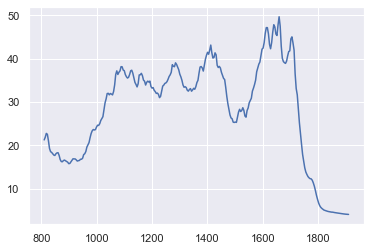

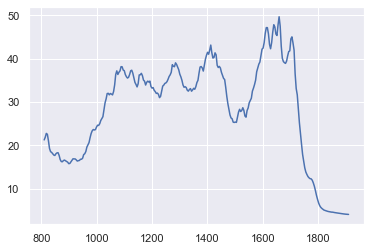

In [10]:
plt.plot(X.columns, X.loc['1'])

(<Figure size 432x288 with 2 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:xlabel='$R[75] = R(\\lambda_{75})=R(1100.047nm)$'>))

(<Figure size 432x288 with 2 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:xlabel='$R[75] = R(\\lambda_{75})=R(1100.047nm)$'>))

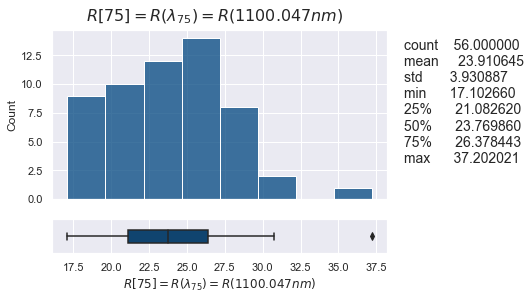

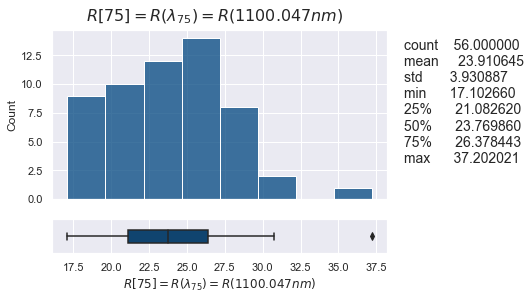

In [11]:
from dslab.visualization.visualize import distribution

R = X[1100.047]
R.name = '$R[75] = R(\lambda_{75})=R(1100.047nm)$'
distribution(R)

(<Figure size 432x288 with 2 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:xlabel='$R[219] = R(\\lambda_{219})=R(1655.884nm)$'>))

(<Figure size 432x288 with 2 Axes>,
 (<AxesSubplot:ylabel='Count'>,
  <AxesSubplot:xlabel='$R[219] = R(\\lambda_{219})=R(1655.884nm)$'>))

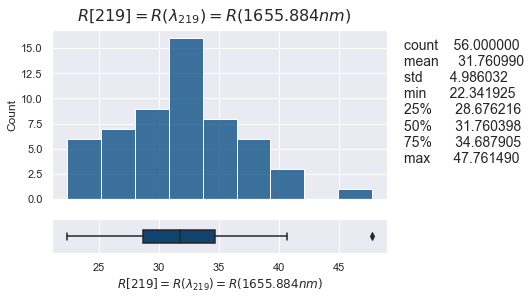

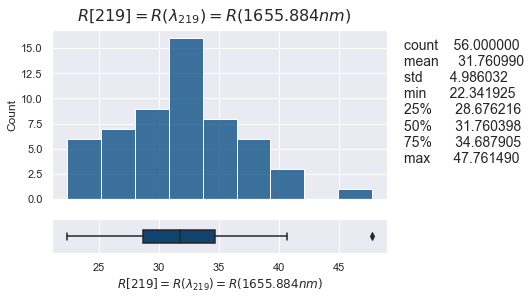

In [12]:
R = X[1655.884]
R.name = '$R[219] = R(\lambda_{219})=R(1655.884nm)$'
distribution(R)

Text(0.5, 0, '$R[75]=R(\\lambda=1100.047nm)$')

Text(0.5, 0, '$R[75]=R(\\lambda=1100.047nm)$')

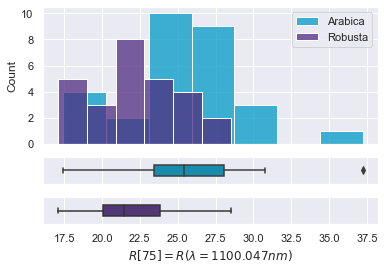

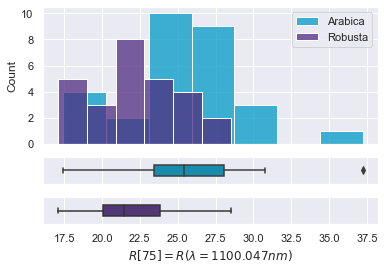

In [13]:
from dslab.visualization.visualize import distributions

distributions(pd.Series(X[1100.047][is_arabica], 
                        name = 'Arabica'),
              pd.Series(X[1100.047][~is_arabica], 
                        name = 'Robusta'),
             both_series=True)
plt.xlabel('$R[75]=R(\lambda=1100.047nm)$')

Text(0.5, 0, '$R[219]=R(\\lambda=1655.884nm)$')

Text(0.5, 0, '$R[219]=R(\\lambda=1655.884nm)$')

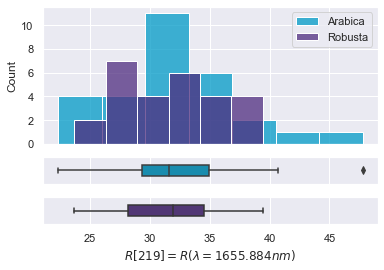

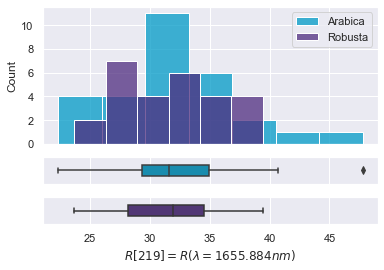

In [14]:
distributions(pd.Series(X[1655.884][is_arabica], 
                        name = 'Arabica'),
              pd.Series(X[1655.884][~is_arabica], 
                        name = 'Robusta'),
             both_series=True)
plt.xlabel('$R[219]=R(\lambda=1655.884nm)$')


In [15]:
y_pred = X[1100.047] > 23
y_pred.head()

1     True
2    False
3     True
4     True
5     True
Name: $R[75] = R(\lambda_{75})=R(1100.047nm)$, dtype: bool

1     True
2    False
3     True
4     True
5     True
Name: $R[75] = R(\lambda_{75})=R(1100.047nm)$, dtype: bool

In [16]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(is_arabica, y_pred.values),
                  columns=[False, True],
                  index=[False, True])
cm.columns.name = 'predicted'
cm.index.name = 'actual'
cm

predicted,False,True
actual,,
False,17,10
True,6,23


predicted,False,True
actual,,
False,17,10
True,6,23


/Users/akem134/opt/anaconda3/envs/dslab/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akem134/opt/anaconda3/envs/dslab/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='$R[75] = R(\\lambda_{75})=R(1100.047nm)$', ylabel='Density'>

<AxesSubplot:xlabel='$R[75] = R(\\lambda_{75})=R(1100.047nm)$', ylabel='Density'>

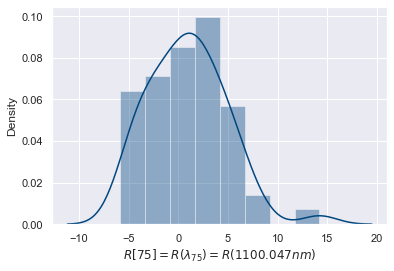

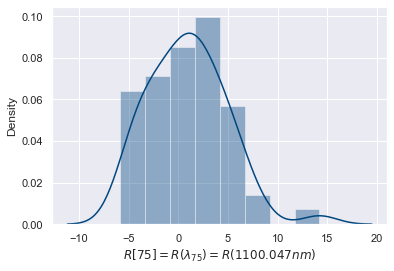

In [17]:
y_score = X[1100.047] - 23
sns.distplot(y_score)

In [18]:
from sklearn.metrics import accuracy_score, auc
accuracy_score(is_arabica, y_pred)

0.7142857142857143

0.7142857142857143

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(is_arabica, 
                                 X[1100.047])

In [20]:
fpr, tpr

(array([0.        , 0.        , 0.        , 0.03703704, 0.03703704,
        0.07407407, 0.07407407, 0.14814815, 0.14814815, 0.18518519,
        0.18518519, 0.22222222, 0.22222222, 0.25925926, 0.25925926,
        0.2962963 , 0.2962963 , 0.40740741, 0.40740741, 0.74074074,
        0.74074074, 0.96296296, 0.96296296, 1.        ]),
 array([0.        , 0.03448276, 0.17241379, 0.17241379, 0.34482759,
        0.34482759, 0.44827586, 0.44827586, 0.51724138, 0.51724138,
        0.5862069 , 0.5862069 , 0.68965517, 0.68965517, 0.72413793,
        0.72413793, 0.79310345, 0.79310345, 0.86206897, 0.86206897,
        0.93103448, 0.93103448, 1.        , 1.        ]))

(array([0.        , 0.        , 0.        , 0.03703704, 0.03703704,
        0.07407407, 0.07407407, 0.14814815, 0.14814815, 0.18518519,
        0.18518519, 0.22222222, 0.22222222, 0.25925926, 0.25925926,
        0.2962963 , 0.2962963 , 0.40740741, 0.40740741, 0.74074074,
        0.74074074, 0.96296296, 0.96296296, 1.        ]),
 array([0.        , 0.03448276, 0.17241379, 0.17241379, 0.34482759,
        0.34482759, 0.44827586, 0.44827586, 0.51724138, 0.51724138,
        0.5862069 , 0.5862069 , 0.68965517, 0.68965517, 0.72413793,
        0.72413793, 0.79310345, 0.79310345, 0.86206897, 0.86206897,
        0.93103448, 0.93103448, 1.        , 1.        ]))

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 1.0, 'ROC curve')

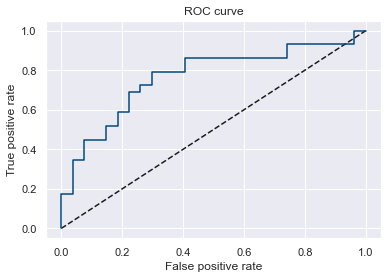

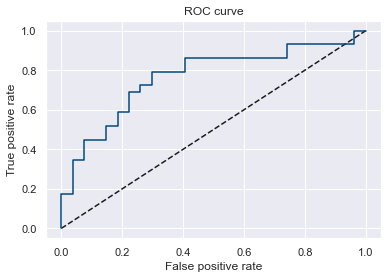

In [21]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='R[75]')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [22]:
fpr2, tpr2, _ = roc_curve(is_arabica, 
                                 X[1655.884])

In [23]:
from sklearn.metrics import roc_curve

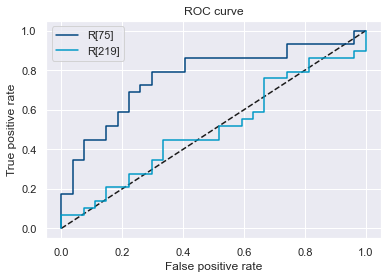

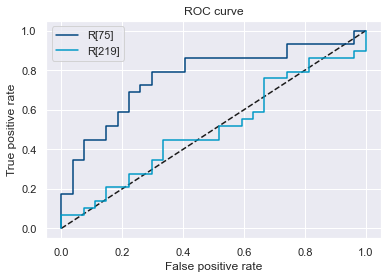

In [24]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='R[75]')
plt.plot(fpr2, tpr2, label='R[219]')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(is_arabica, X[1655.884])

0.5019157088122604

0.5019157088122604

In [26]:
roc_auc_score(is_arabica, X[1100.047])

0.7650063856960408

0.7650063856960408